# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import openweathermapy as owm
import pandas as pd
import numpy as np
import requests
import time
import urllib
# Import API key
from api_keys import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [52]:
settings = {"units": "imperial", "appid": api_key}

## Generate Cities List

In [53]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [57]:
#Establish variables for data set counters and an empty dataframe to append weather info from openweathermap to
record_counter=0
set_counter=1
weather_data=[]
print('Beginning Data Retrieval')
print('-------------------------')
#For loop to cycle through every city to make sure the city is in openweathermap
for city in cities:
    
    try: owm.get_current(city,**settings)
    
    except:
        print('City not found,skipping...')
    
    else:
        print(f'Processing Record {record_counter} of Set {set_counter} | {city}')
        record_counter=record_counter+1
        #adds weather info in json to a list so that it can be processed into a detailed dataframe later on
        data.append(owm.get_current(city,**settings))
        #delays calls to 1 second per call to make sure it complies with API rules
        time.sleep(1)
        #splits records into sets of 49
        if record_counter > 49:
            #resets record counter
            record_counter=0
            #increases the value of set_counter by 1
            set_counter=set_counter+1
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

Beginning Data Retrieval
-------------------------
Processing Record 0 of Set 1 | nikolskoye
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | margate
Processing Record 4 of Set 1 | nome
Processing Record 5 of Set 1 | suvorovo
Processing Record 6 of Set 1 | richards bay
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | le moule
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | hermanus
City not found,skipping...
City not found,skipping...
City not found,skipping...
Processing Record 11 of Set 1 | guerrero negro
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | karlskoga
Processing Record 14 of Set 1 | codrington
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | cayenne
City not found,skipping...
Processing Record 17 of Set 1 | lavrentiya
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set

Processing Record 36 of Set 4 | sao filipe
Processing Record 37 of Set 4 | cabo san lucas
Processing Record 38 of Set 4 | tiksi
Processing Record 39 of Set 4 | pochutla
Processing Record 40 of Set 4 | voh
Processing Record 41 of Set 4 | hobyo
Processing Record 42 of Set 4 | hudson bay
Processing Record 43 of Set 4 | yar-sale
Processing Record 44 of Set 4 | dicabisagan
Processing Record 45 of Set 4 | fort nelson
Processing Record 46 of Set 4 | namatanai
Processing Record 47 of Set 4 | zhireken
Processing Record 48 of Set 4 | rio grande
Processing Record 49 of Set 4 | beringovskiy
Processing Record 0 of Set 5 | castro
Processing Record 1 of Set 5 | portland
Processing Record 2 of Set 5 | pervomayskiy
Processing Record 3 of Set 5 | iqaluit
Processing Record 4 of Set 5 | pierre
Processing Record 5 of Set 5 | carndonagh
Processing Record 6 of Set 5 | khatanga
Processing Record 7 of Set 5 | sobolevo
Processing Record 8 of Set 5 | praia
City not found,skipping...
Processing Record 9 of Set 5 

Processing Record 28 of Set 8 | puerto el triunfo
Processing Record 29 of Set 8 | herat
City not found,skipping...
City not found,skipping...
Processing Record 30 of Set 8 | sakaraha
Processing Record 31 of Set 8 | coahuayana
Processing Record 32 of Set 8 | chipiona
City not found,skipping...
Processing Record 33 of Set 8 | pathein
Processing Record 34 of Set 8 | mecca
Processing Record 35 of Set 8 | pouembout
City not found,skipping...
Processing Record 36 of Set 8 | omsukchan
Processing Record 37 of Set 8 | barcelos
City not found,skipping...
Processing Record 38 of Set 8 | dobryanka
Processing Record 39 of Set 8 | jiangyou
Processing Record 40 of Set 8 | faanui
Processing Record 41 of Set 8 | scarborough
Processing Record 42 of Set 8 | mackay
Processing Record 43 of Set 8 | kedrovyy
Processing Record 44 of Set 8 | puerto leguizamo
Processing Record 45 of Set 8 | pirovskoye
Processing Record 46 of Set 8 | iracoubo
Processing Record 47 of Set 8 | goderich
Processing Record 48 of Set 8

Processing Record 4 of Set 12 | oktyabrskoye
Processing Record 5 of Set 12 | trat
Processing Record 6 of Set 12 | almaznyy
City not found,skipping...
Processing Record 7 of Set 12 | tigil
Processing Record 8 of Set 12 | rapid city
Processing Record 9 of Set 12 | walvis bay
Processing Record 10 of Set 12 | rengasdengklok
Processing Record 11 of Set 12 | solnechnyy
-------------------------
Data Retrieval Complete
-------------------------


In [58]:
#Establishes columns for dataframe
columns=['City','Cloudiness(%)','Country','Date in Unix','Humidity(%)','Latitude','Longitude','Max Temp (\u00b0F)','Wind Speed in MPH']
#Establishes summary information for openweathermapp functions to process the json data into a dataframe.
summary=['name','clouds.all','sys.country','dt','main.humidity','coord.lat','coord.lon','main.temp_max','wind.speed']
#cycles through every city dictionary and processes data into a list
for city in weather_data:
    weather = [response(*summary) for response in weather_data]

In [59]:
#Takes weather list responses and processeses it into a dataframe without an index
weatherdf=pd.DataFrame(weather,columns=columns,index=None)
weatherdf.head()

,City,Cloudiness(%),Country,Date in Unix,Humidity(%),Latitude,Longitude,Max Temp (°F),Wind Speed in MPH
0,Lompoc,90,US,1566714891,100,34.64,-120.46,64.4,4.72
1,Ushuaia,0,AR,1566714761,86,-54.81,-68.31,39.2,9.17
2,Provideniya,76,RU,1566714794,63,64.42,-173.23,53.5,4.16
3,Bredasdorp,0,ZA,1566715087,76,-34.53,20.04,61.0,2.24
4,Busselton,0,AU,1566714827,31,-33.64,115.35,66.0,1.43


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [60]:
#Saves to an excel sheet titled "Weather_Data" in comma separated value format
weatherdf.to_csv('../Resources/Weather_Data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

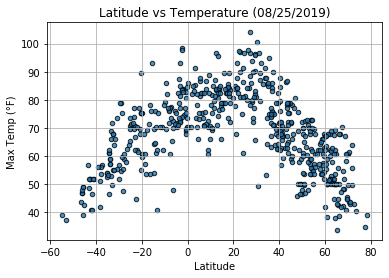

In [61]:
#Graphs Latitude vs Temperature and saves a PNG to Resources
latvstemp=weatherdf.plot(kind='scatter',
                         x="Latitude",
                         y="Max Temp (\u00b0F)",
                         title='Latitude vs Temperature (08/25/2019)',
                         marker="o",
                         grid=True,
                         edgecolors='black',
                         alpha='0.8')
lat_temp_img=latvstemp.get_figure()
lat_temp_img.savefig('../Resources/Latitude vs. Temperature.png')

#### Latitude vs. Humidity Plot

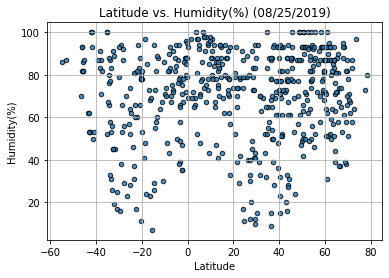

In [62]:
#Graphs Latitude vs Humidity and saves a PNG to Resources
latvshum=weatherdf.plot(kind='scatter',
                        x='Latitude',
                        y='Humidity(%)',
                        title='Latitude vs. Humidity(%) (08/25/2019)',
                        grid=True,
                        marker="o",
                        edgecolors='black',
                        alpha='0.8')
lat_hum_img=latvshum.get_figure()
lat_hum_img.savefig('../Resources/Latitude vs. Humidity.png')

#### Latitude vs. Cloudiness Plot

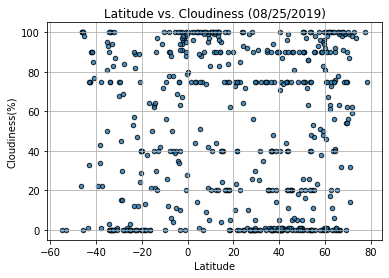

In [63]:
#Graphs Latitude vs Cloudiness and saves a PNG to Resources
latvscloud=weatherdf.plot(kind='scatter',
                          x='Latitude',
                          y='Cloudiness(%)',
                          title='Latitude vs. Cloudiness (08/25/2019)',
                          grid=True,
                          marker='o',
                          edgecolor='black',
                          alpha='0.8')
lat_cloud_img=latvscloud.get_figure()
lat_cloud_img.savefig('../Resources/Latitude vs. Cloudiness.png')

#### Latitude vs. Wind Speed Plot

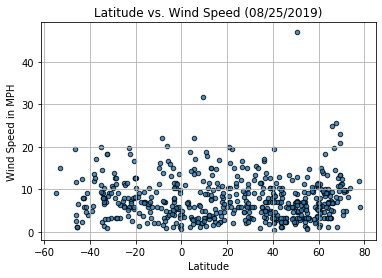

In [64]:
#Graphs Latitude vs Wind Speed and saves a PNG to Resources
latvswindspeed=weatherdf.plot(kind='scatter',
                              x='Latitude',
                              y='Wind Speed in MPH',
                              title='Latitude vs. Wind Speed (08/25/2019)',
                              grid=True,
                              marker='o',
                              edgecolor='black',
                              alpha='0.8')
lat_windspeed_img=latvswindspeed.get_figure()
lat_windspeed_img.savefig('../Resources/Latitude vs. Wind Speed.png')